In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import time
from datetime import timedelta
from tqdm import tqdm

In [2]:
df = pd.read_csv('../data/3. Модификации.csv')

In [3]:
def calculate_dtw_distance(ts1, ts2):
    distance, _ = fastdtw(ts1, ts2)
    return distance

def initialize_clusters(data, k):
    np.random.seed(0)
    centroids_indices = np.random.choice(len(data), k, replace=False)
    return [data[i] for i in centroids_indices]

def assign_to_clusters(data, clusters):
    assignments = []
    for ts in data:
        min_distance = float('inf')
        assigned_cluster = None
        for centroid_idx, centroid in enumerate(clusters):
            distance = calculate_dtw_distance(ts, centroid)
            if distance < min_distance:
                min_distance = distance
                assigned_cluster = centroid_idx
        assignments.append(assigned_cluster)
    return assignments

def update_centroids(data, assignments, k):
    new_clusters = []
    for cluster_idx in range(k):
        cluster_data = [data[i] for i, assignment in enumerate(assignments) if assignment == cluster_idx]
        new_centroid = np.mean(cluster_data, axis=0)
        new_clusters.append(new_centroid)
    return new_clusters

def k_means_with_dtw(data, k, max_iterations):
    clusters = initialize_clusters(data, k)
    for _ in tqdm(range(max_iterations)):
        old_clusters = clusters
        assignments = assign_to_clusters(data, clusters)
        clusters = update_centroids(data, assignments, k)
        if np.array_equal(old_clusters, clusters):
            break
    return assignments, clusters


In [4]:
elements = 50
# Пример использования
data = df.values[:elements]
k = 3
max_iterations = 100

start_time = time.time()
assignments, clusters = k_means_with_dtw(data, k, max_iterations)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
print(f"Time taken: {formatted_time}")


  3%|██▍                                                                               | 3/100 [00:13<07:06,  4.40s/it]

Time taken: 0:00:13.202703


In [ ]:
data = df.values
k = 3
max_iterations = 100
start_time = time.time()
assignments, clusters = k_means_with_dtw(data, k, max_iterations)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
print(f"Time taken: {formatted_time}")

In [ ]:
elements = 500
data = df.values[:500]
k = 3
max_iterations = 100
start_time = time.time()
assignments, clusters = k_means_with_dtw(data, k, max_iterations)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
print(f"Time taken: {formatted_time}")

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(data, assignments, centroids):
    plt.figure(figsize=(10, 6))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Цвета для различных кластеров (можно добавить еще)
    
    for cluster_idx, centroid in enumerate(centroids):
        cluster_data = [data[i] for i, assignment in enumerate(assignments) if assignment == cluster_idx]
        for ts in cluster_data:
            plt.plot(ts, color=colors[cluster_idx], alpha=0.5)
        
        # Визуализация центроида кластера
        plt.plot(centroid, color=colors[cluster_idx], linewidth=2, label=f'Cluster {cluster_idx + 1} centroid')
    
    plt.title('Clusters Visualization')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()



In [ ]:
plot_clusters(data, assignments, clusters)

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Преобразовываем данные в двумерное пространство с помощью t-SNE
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data)

# Визуализируем кластеры
plt.figure(figsize=(10, 8))
for cluster_idx in range(k):
    cluster_data = data_tsne[np.array(assignments) == cluster_idx]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_idx + 1}')

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

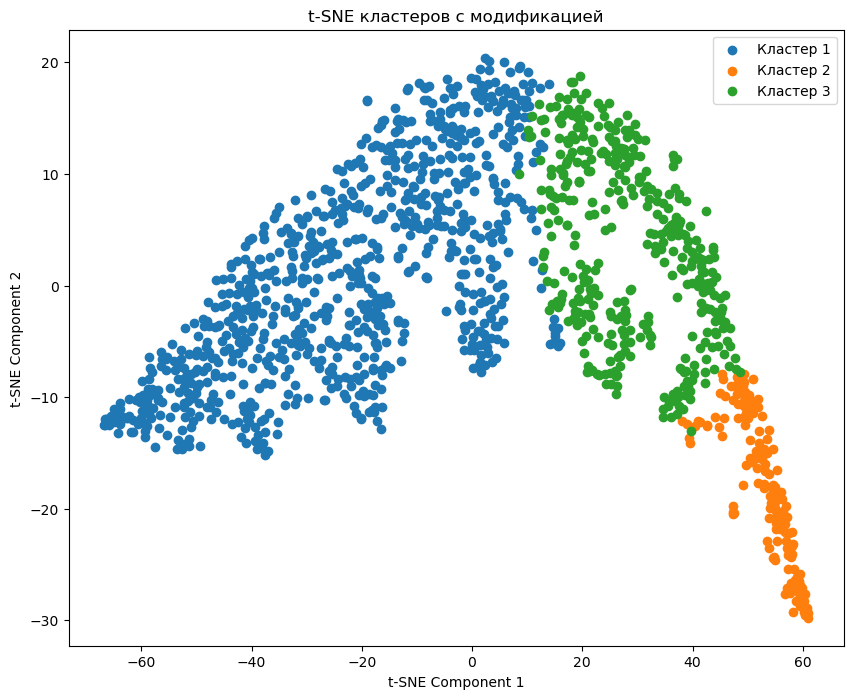

In [31]:
# Преобразовываем данные в двумерное пространство с помощью t-SNE
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data)

# Визуализируем кластеры
plt.figure(figsize=(10, 8))
for cluster_idx in range(k):
    cluster_data = data_tsne[np.array(assignments) == cluster_idx]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Кластер {cluster_idx + 1}')

plt.title('t-SNE кластеров с модификацией')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score

def evaluate_clustering(data, assignments, centroids):
    silhouette = silhouette_score(data, assignments)
    davies_bouldin = davies_bouldin_score(data, assignments)
    calinski_harabasz = calinski_harabasz_score(data, assignments)
    return silhouette, davies_bouldin, calinski_harabasz

# Пример использования
k = 2
max_iterations = 100
#assignments, centroids = k_means_with_dtw(data, k, max_iterations)


In [17]:
silhouette, davies_bouldin, calinski_harabasz = evaluate_clustering(data, assignments, clusters)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.4894048422519687
Davies-Bouldin Index: 0.7500922016335126
Calinski-Harabasz Index: 2292.1591765386825


In [18]:
df_general = pd.read_csv('../data/2. Восстановленные')

In [19]:
df_general = df_general.dropna()

In [21]:
df_general = df_general[df_general.columns[:400]]

In [23]:
from datetime import timedelta

# Пример использования
data = df_general.values[:50]
k = 3
max_iterations = 100
start_time = time.time()
assignments, clusters = k_means_with_dtw(data, k, max_iterations)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
print(f"Time taken: {formatted_time}")


  3%|██▍                                                                               | 3/100 [00:16<08:41,  5.38s/it]

Time taken: 0:00:16.129799


In [24]:
from datetime import timedelta

# Пример использования
data = df_general.values[:75]
k = 3
max_iterations = 100
start_time = time.time()
assignments, clusters = k_means_with_dtw(data, k, max_iterations)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
print(f"Time taken: {formatted_time}")


  7%|█████▋                                                                            | 7/100 [00:44<09:45,  6.30s/it]

Time taken: 0:00:44.075939


In [ ]:
from datetime import timedelta

# Пример использования
data = df_general.values[:100]
k = 3
max_iterations = 100
start_time = time.time()
assignments, clusters = k_means_with_dtw(data, k, max_iterations)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
print(f"Time taken: {formatted_time}")


In [25]:
from datetime import timedelta

# Пример использования
data = df_general.values
k = 3
max_iterations = 100
start_time = time.time()
assignments, clusters = k_means_with_dtw(data, k, max_iterations)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
print(f"Time taken: {formatted_time}")


 14%|██████████▉                                                                   | 14/100 [24:30<2:30:31, 105.02s/it]

Time taken: 0:24:30.226136


In [ ]:
# Пример использования
plot_clusters(data, assignments, centroids)


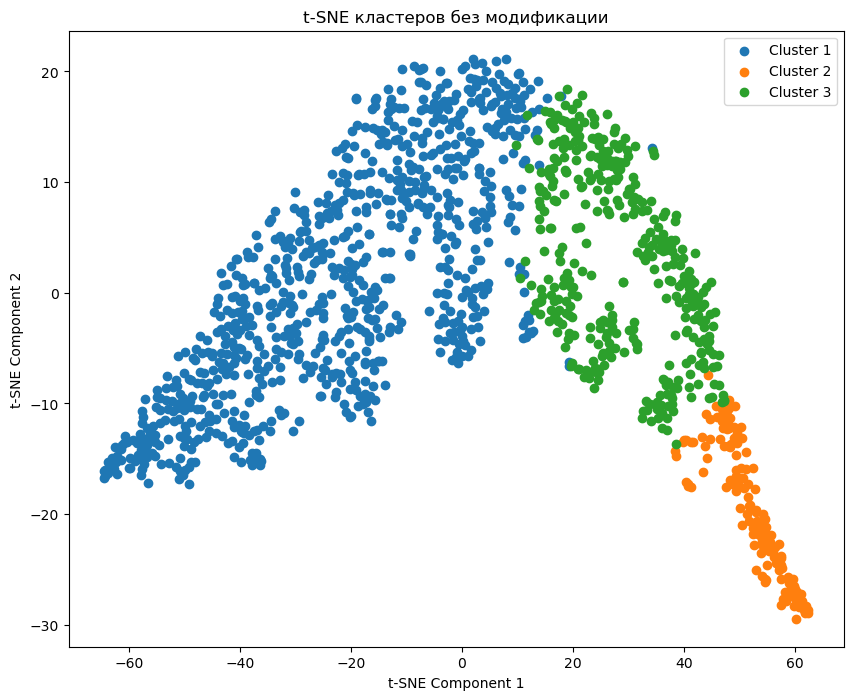

In [28]:
# Преобразовываем данные в двумерное пространство с помощью t-SNE
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data)

# Визуализируем кластеры
plt.figure(figsize=(10, 8))
for cluster_idx in range(k):
    cluster_data = data_tsne[np.array(assignments) == cluster_idx]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_idx + 1}')
plt.title('t-SNE кластеров без модификации')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [27]:
silhouette, davies_bouldin, calinski_harabasz = evaluate_clustering(data, assignments, clusters)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.4996210532495697
Davies-Bouldin Index: 0.7280089954788623
Calinski-Harabasz Index: 2385.958589015848
